# TensorFlow Assignment: Playing with GANs

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Rachel Kositsky

### Interpolating between images

As our “random noise” varies, so does the image our GAN generates. Perturbing the random input a little bit should perturb the image a little bit. This means that by taking small steps from one input to another, we can “animate” the transition from the image our GAN draws for the first to the one it draws for the second. Generate two random samples from a GAN, and interpolate between them (with, say, 100 steps).

In particular:
1. Train a GAN (using code from class).
2. Generate some noise `= np.random.uniform(-1, 1, [10, 32])` (for instance).
3. Get some fake images out using `sess.run(fake_X, {z: noise})`
4. Visualize them using `visualize_row()` and choose two images you like (say, image 1 and 3). Pull out `start` and `end` noise vectors (e.g., `start = noise[0]` and `end = noise[2]`).
5. Generate a list of ten vectors `steps = [..., ..., ...]`, where entry `i` is `i*10`% of the way from start to end.
6. `np.concatenate(steps)` (with appropriate axis) to get a new noise matrix. Run the GAN on that noise matrix, and visualize the 10 images you get as results.

In [1]:
### YOUR CODE HERE

# Import
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

# Utility functions
def variables_from_scope(scope_name):
    """
    Returns a list of all variables in a given scope. This is useful when
    you'd like to back-propagate only to weights in one part of the network
    (in our case, the generator or the discriminator).
    """
    return tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope=scope_name)

def visualize_row(images, img_width=28, cmap='gray'):
    """
    Takes in a tensor of images of given width, and displays them in a column
    in a plot, using `cmap` to map from numbers to colors.
    """
    im = np.reshape(images, [-1, img_width])
    plt.figure()
    plt.imshow(im, cmap=cmap)
    plt.show()

def generator(z):
    hidden_layer = tf.layers.dense(z, intermediate_layer_size, activation=tf.nn.relu)
    fake_X = tf.layers.dense(hidden_layer, image_size, activation=tf.sigmoid)
    return fake_X

def discriminator(images):
    hidden_layer = tf.layers.dense(images, intermediate_layer_size, name="D1", activation=tf.nn.relu)
    D_output = tf.layers.dense(hidden_layer, 1, name="D2", activation=tf.sigmoid)
    return D_output

# Load data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# Hyperparameters
# Graph parameters
z_dimension = 32
intermediate_layer_size = 128
image_size = 784
# Training parameters
batch_size = 50
iterations = 25000

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Building the graph

tf.reset_default_graph()

# Placeholders
real_X = tf.placeholder(tf.float32, [None, image_size])
z = tf.placeholder(tf.float32, [None, z_dimension])

# Generator
with tf.variable_scope("generator") as scope:
    fake_X = generator(z)

# Discriminator
with tf.variable_scope("discriminator") as scope:
    d_on_fake = discriminator(fake_X)
    scope.reuse_variables()
    d_on_real = discriminator(real_X)

g_loss = -tf.reduce_mean(tf.log(d_on_fake + 1e-7))
d_loss = -tf.reduce_mean(tf.log(d_on_real + 1e-7) + tf.log(1. - d_on_fake + 1e-7))

optimize_d = tf.train.AdamOptimizer().minimize(d_loss, var_list=variables_from_scope("discriminator"))
optimize_g = tf.train.AdamOptimizer().minimize(g_loss, var_list=variables_from_scope("generator"))

initialize_all = tf.global_variables_initializer()

Iter [       0] Time [0.0051] d_loss [0.6603]


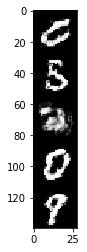

Iter [    1000] Time [3.4105] d_loss [0.7061]


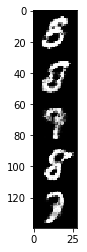

Iter [    2000] Time [6.8117] d_loss [0.7251]


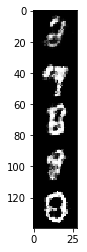

Iter [    3000] Time [10.2556] d_loss [0.6158]


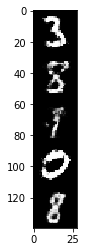

Iter [    4000] Time [13.9397] d_loss [0.7605]


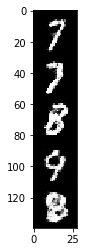

Iter [    5000] Time [17.2966] d_loss [0.7156]


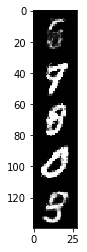

Iter [    6000] Time [20.6414] d_loss [0.9341]


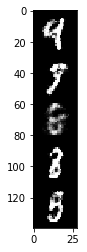

Iter [    7000] Time [24.1569] d_loss [0.7732]


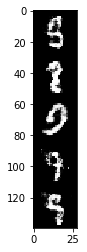

Iter [    8000] Time [27.5357] d_loss [0.5585]


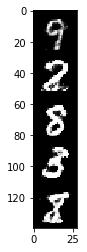

Iter [    9000] Time [30.9628] d_loss [0.5255]


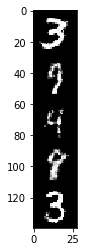

Iter [   10000] Time [34.3171] d_loss [0.7590]


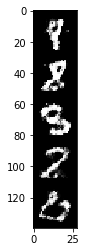

Iter [   11000] Time [37.8363] d_loss [0.7574]


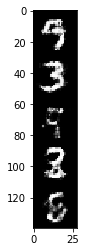

Iter [   12000] Time [41.5143] d_loss [0.7866]


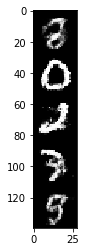

Iter [   13000] Time [45.2196] d_loss [0.7167]


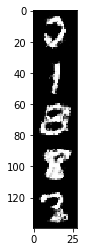

Iter [   14000] Time [49.1011] d_loss [0.5846]


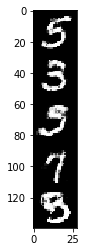

Iter [   15000] Time [52.6729] d_loss [0.4987]


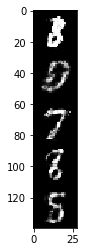

Iter [   16000] Time [56.2506] d_loss [0.6803]


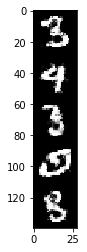

Iter [   17000] Time [59.5410] d_loss [0.8288]


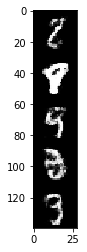

Iter [   18000] Time [62.9751] d_loss [0.7071]


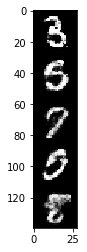

Iter [   19000] Time [66.3115] d_loss [0.6327]


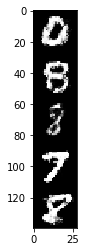

Iter [   20000] Time [69.6617] d_loss [0.6976]


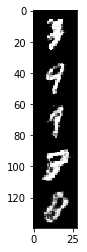

Iter [   21000] Time [72.9900] d_loss [0.7415]


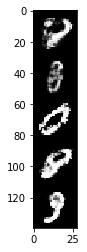

Iter [   22000] Time [76.2527] d_loss [0.7089]


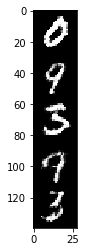

Iter [   23000] Time [79.4939] d_loss [0.7148]


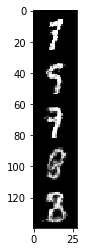

Iter [   24000] Time [82.8590] d_loss [0.6280]


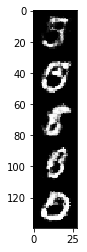

Iter [   24999] Time [86.1346] d_loss [0.6476]


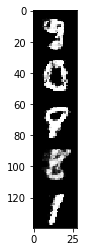

In [6]:
# Train the GAN

def make_noise():
    return np.random.uniform(-1.0, 1.0, [batch_size, z_dimension])

def next_feed_dict():
    return {real_X: mnist.train.next_batch(batch_size)[0],
            z:      make_noise()}

#sess = tf.Session()
#sess.run(initialize_all)

start_time = time.time()
for t in range(iterations):
    sess.run(optimize_g, feed_dict=next_feed_dict())
    _, loss = sess.run([optimize_d, d_loss], feed_dict=next_feed_dict())

    if t % 1000 == 0 or t+1 == iterations:
        fake_data = sess.run(fake_X, feed_dict={z: make_noise()})
        print('Iter [%8d] Time [%5.4f] d_loss [%.4f]' % (t, time.time() - start_time, loss))
        visualize_row(fake_data[:5])

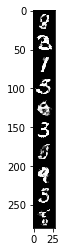

In [7]:
# Interpolation: choose images

# Generate some noise
noise = np.random.uniform(-1.0, 1.0, [10, z_dimension])

# Get fake images
fake_data = sess.run(fake_X, feed_dict={z: noise})
visualize_row(fake_data)

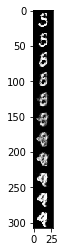

In [36]:
# Choose images
start = noise[8, :]
end = noise[7, :]

n_middle = 10
middle = [((end - start)/n_middle)*(i) + start for i in range(n_middle+1)]

# Visualize images
visualize_row(sess.run(fake_X, feed_dict={z: middle}))

### Conditioning on the class label

In class, we drew a random noise vector $z$, and passed it into the Generator. This gave us very little control over the images we generated. Suppose we wanted to be able to generate a random image of a two, or of a three. In other words, we want to train the model to know how to draw whatever digit we tell it to. How could you alter the training procedure to make this work? Implement a conditional GAN, and use it to generate twos or threes.

In particular,

1. Modify the code from class to take placeholder inputs (real images and z values) that are 10 elements longer.
2. Modify the next_feed_dict to concatenate labels (one-hot, ten-dimensional) to the noise inputs and image inputs.
3. Train the GAN.
4. Try making the GAN generate a few ones, then a few threes, by concatenating `[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]` or `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`, say, to your noise vectors. How does it do?

In [87]:
### YOUR CODE HERE

## Hyperparameters
conditional_z_dim = z_dimension + 10
conditional_image_size = image_size + 10

def conditional_generator(z):
    hidden_layer = tf.layers.dense(z, intermediate_layer_size, activation=tf.nn.relu)
    fake_X = tf.layers.dense(hidden_layer, conditional_image_size, activation=tf.sigmoid)
    return fake_X

## Building the graph
tf.reset_default_graph()

# Placeholders
real_X = tf.placeholder(tf.float32, [None, conditional_image_size])
z = tf.placeholder(tf.float32, [None, conditional_z_dim])

# Generator
with tf.variable_scope("generator") as scope:
    fake_X = conditional_generator(z)

# Discriminator
with tf.variable_scope("discriminator") as scope:
    d_on_fake = discriminator(fake_X)
    scope.reuse_variables()
    d_on_real = discriminator(real_X)

g_loss = -tf.reduce_mean(tf.log(d_on_fake + 1e-7))
d_loss = -tf.reduce_mean(tf.log(d_on_real + 1e-7) + tf.log(1. - d_on_fake + 1e-7))

optimize_d = tf.train.AdamOptimizer().minimize(d_loss, var_list=variables_from_scope("discriminator"))
optimize_g = tf.train.AdamOptimizer().minimize(g_loss, var_list=variables_from_scope("generator"))

initialize_all = tf.global_variables_initializer()

## Train the GAN
def make_noise():
    return np.random.uniform(-1.0, 1.0, [batch_size, conditional_z_dim])

def next_feed_dict():
    real_images, real_labels = mnist.train.next_batch(batch_size)
    # Concatenate real labels to image
    real_images = np.concatenate([real_images, real_labels], axis=1)
    # Replace real labels in noise - get the same mix of labels
    noise = make_noise()
    noise[:,-10:] = real_labels
    #noise = np.concatenate([noise, real_labels], axis=1)
    return {real_X: real_images,
            z:      noise}

Iter [       0] Time [0.0056] d_loss [0.3434]


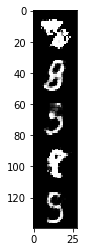

Iter [    1000] Time [3.9711] d_loss [0.4853]


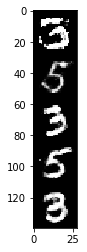

Iter [    2000] Time [7.5267] d_loss [0.5681]


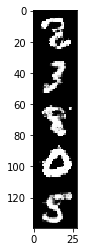

Iter [    3000] Time [10.9415] d_loss [0.4723]


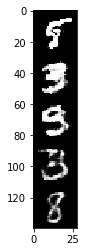

Iter [    4000] Time [14.4917] d_loss [0.4096]


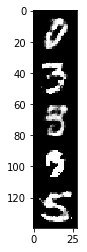

Iter [    5000] Time [18.2171] d_loss [0.4086]


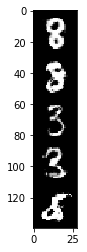

Iter [    6000] Time [22.3197] d_loss [0.5122]


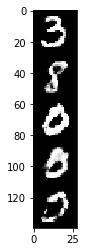

Iter [    7000] Time [25.8987] d_loss [0.4969]


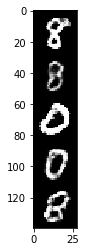

Iter [    8000] Time [29.9279] d_loss [0.4305]


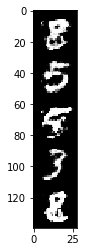

Iter [    9000] Time [33.8289] d_loss [0.5075]


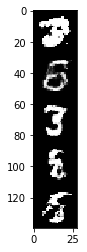

Iter [   10000] Time [37.2497] d_loss [0.6345]


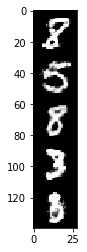

Iter [   11000] Time [41.4845] d_loss [0.3997]


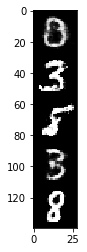

Iter [   12000] Time [45.4912] d_loss [0.6389]


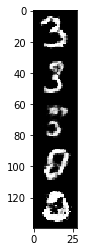

Iter [   13000] Time [49.4110] d_loss [0.5567]


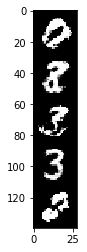

Iter [   14000] Time [53.1191] d_loss [0.5838]


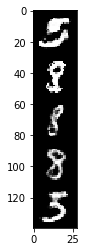

Iter [   15000] Time [57.1505] d_loss [0.4223]


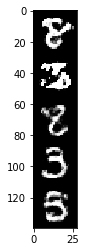

Iter [   16000] Time [61.2681] d_loss [0.7129]


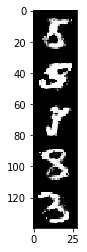

Iter [   17000] Time [65.4008] d_loss [0.5171]


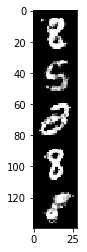

Iter [   18000] Time [69.6059] d_loss [0.5818]


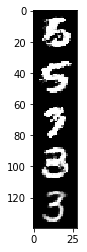

Iter [   19000] Time [73.1251] d_loss [0.4704]


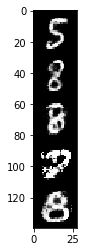

Iter [   20000] Time [77.1794] d_loss [0.6673]


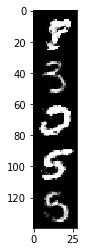

Iter [   21000] Time [81.1613] d_loss [0.5904]


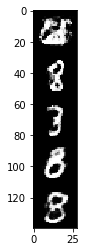

Iter [   22000] Time [85.3844] d_loss [0.4959]


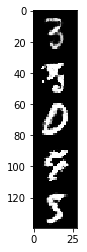

Iter [   23000] Time [89.2681] d_loss [0.4174]


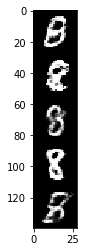

Iter [   24000] Time [92.7617] d_loss [0.2853]


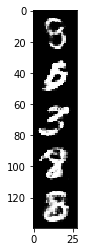

Iter [   24999] Time [96.1979] d_loss [0.6141]


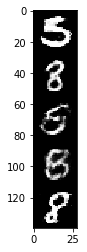

In [115]:
## Train the GAN
sess = tf.Session()
sess.run(initialize_all)

start_time = time.time()
for t in range(iterations):
    sess.run(optimize_g, feed_dict=next_feed_dict())
    _, loss = sess.run([optimize_d, d_loss], feed_dict=next_feed_dict())

    if t % 1000 == 0 or t+1 == iterations:
        fake_data = sess.run(fake_X, feed_dict={z: make_noise()})
        print('Iter [%8d] Time [%5.4f] d_loss [%.4f]' % (t, time.time() - start_time, loss))
        visualize_row(fake_data[:5, :784])

Fake ones:


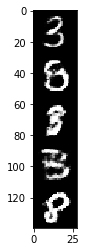

Fake threes:


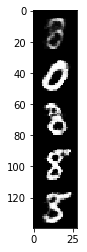

In [116]:
## Make some ones and threes

def make_digit_noise(digit, batch_n):
    noise = np.random.uniform(-1.0, 1.0, [batch_n, 32])
    digit_vec = np.zeros([batch_n, 10])
    #print(noise.shape)
    digit_vec[:, digit] = 1
    #print(digit_vec.shape)
    return np.concatenate([noise, digit_vec], axis=1)

print("Fake ones:")
fake_ones = sess.run(fake_X, feed_dict={z: make_digit_noise(1, 5)})
visualize_row(fake_ones[:, :784])

print("Fake threes:")
fake_ones = sess.run(fake_X, feed_dict={z: make_digit_noise(3, 5)})
visualize_row(fake_ones[:, :784])

The conditional GAN did not work as expected. It may be that the labels vector is incorrectly passed in, or that the discriminator is not taking the expected label into account as it should be.